## Load in packages and modified FROMAGe

In [1]:
%cd ..

/home/nils/NILS/Master/DL2/DL2-ZeroVis


In [2]:
from src.fromage_inf.inf_utils import PromptParser
import pickle

In [3]:
parser = PromptParser("src/fromage_inf/fromage_model/")

# Load the relations dictionary to make the relations.
relations_dict = pickle.load(open("src/code/relations_dict.pkl", "rb"))

Using facebook/opt-6.7b for the language model.
Freezing the LM.
Initializing embedding for the retrieval token [RET] (id = 50266).


In [4]:
model = parser.model
relations = model.visual_embs

# Visual arithmetics

### The W2V approach

companies -> CEOs
Arithmetic:
CEOs/mark_zuckerberg + (companies/microsoft - CEOs/bill_gates)
Expected result: companies/facebook
Model generated outputs:


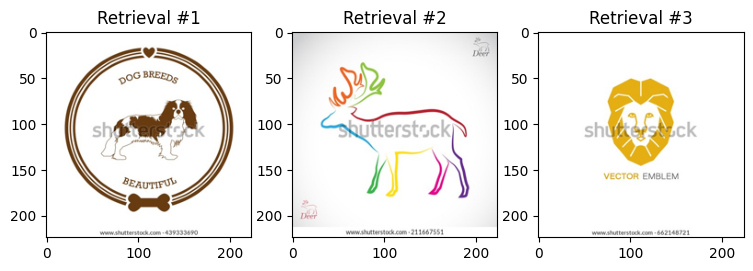

Arithmetic:
CEOs/bill_gates + (companies/tesla - CEOs/elon_musk)
Expected result: companies/microsoft
Model generated outputs:


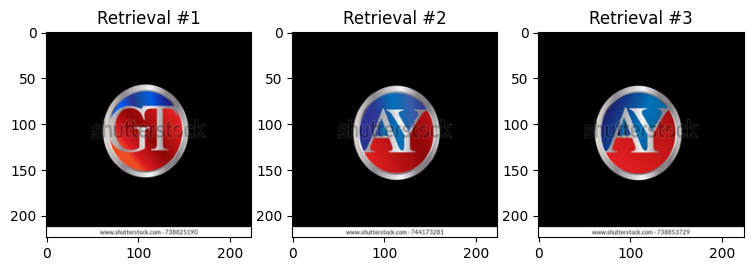

Arithmetic:
CEOs/elon_musk + (companies/amazon - CEOs/jeff_bezos)
Expected result: companies/tesla
Model generated outputs:


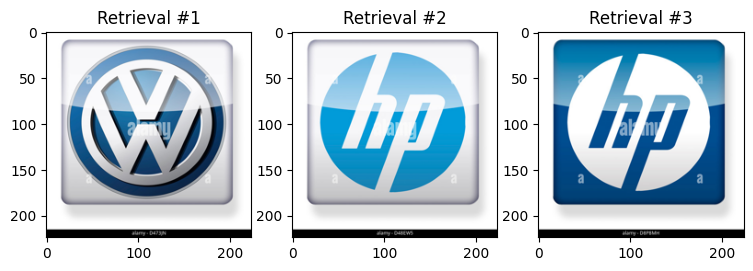

Arithmetic:
CEOs/jeff_bezos + (companies/apple - CEOs/steve_jobs)
Expected result: companies/amazon
Model generated outputs:


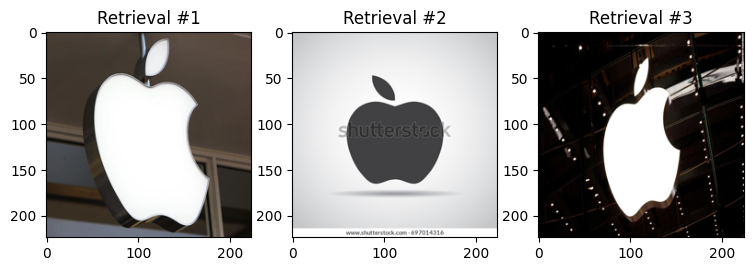

Arithmetic:
CEOs/steve_jobs + (companies/facebook - CEOs/mark_zuckerberg)
Expected result: companies/apple
Model generated outputs:


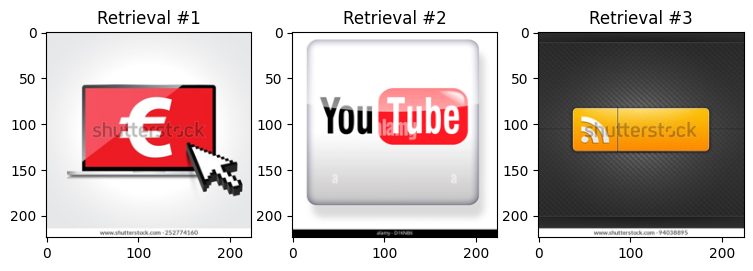

flags -> capital
Arithmetic:
cities/beijing + (flags/egypt - cities/cairo)
Expected result: flags/china
Model generated outputs:


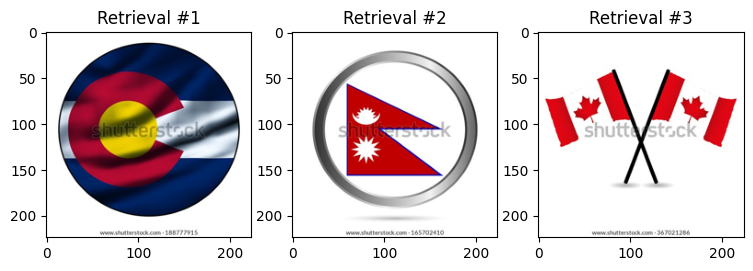

Arithmetic:
cities/cairo + (flags/australia - cities/canberra)
Expected result: flags/egypt
Model generated outputs:


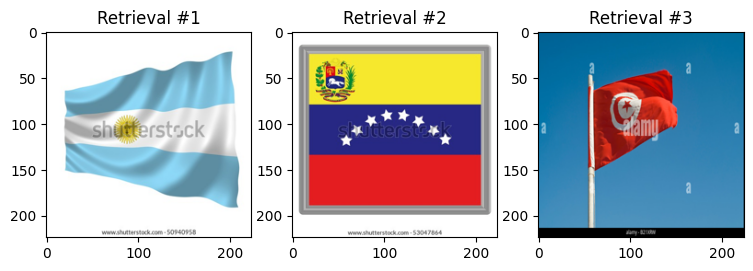

Arithmetic:
cities/canberra + (flags/cuba - cities/havana)
Expected result: flags/australia
Model generated outputs:


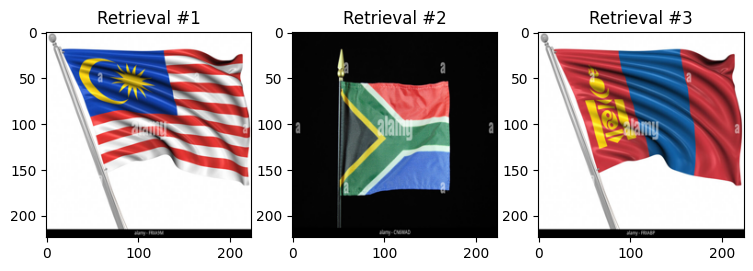

Arithmetic:
cities/havana + (flags/afghanistan - cities/kabul)
Expected result: flags/cuba
Model generated outputs:


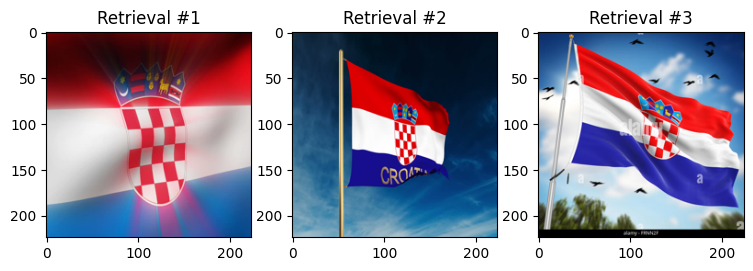

Arithmetic:
cities/kabul + (flags/england - cities/london)
Expected result: flags/afghanistan
Model generated outputs:


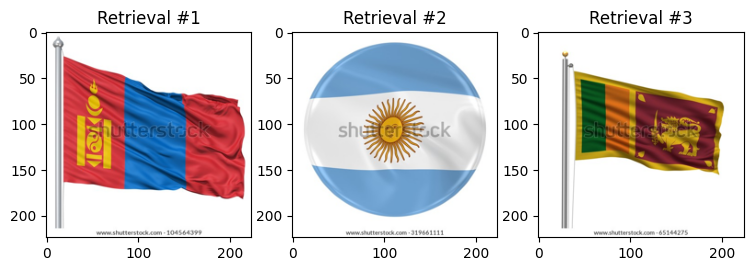

Arithmetic:
cities/london + (flags/japan - cities/tokyo)
Expected result: flags/england
Model generated outputs:


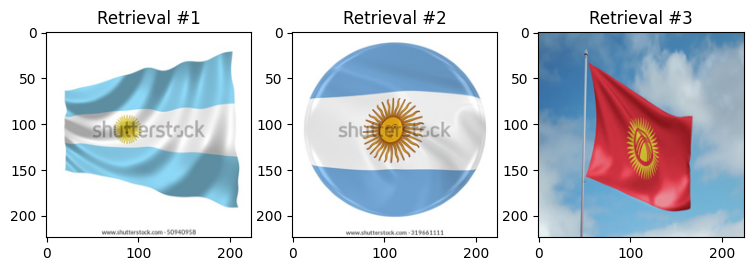

Arithmetic:
cities/tokyo + (flags/russia - cities/moscow)
Expected result: flags/japan
Model generated outputs:


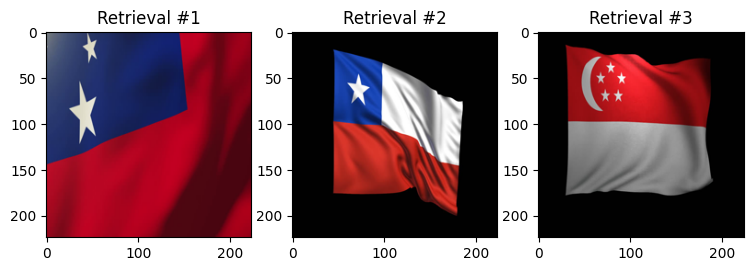

Arithmetic:
cities/moscow + (flags/france - cities/paris)
Expected result: flags/russia
Model generated outputs:


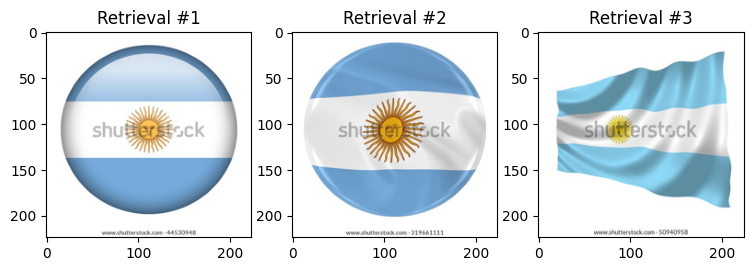

Arithmetic:
cities/paris + (flags/usa - cities/washington)
Expected result: flags/france
Model generated outputs:


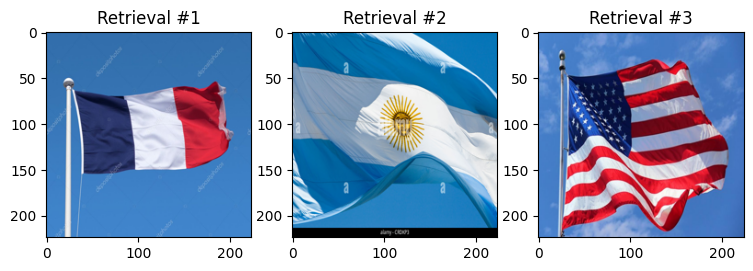

Arithmetic:
cities/washington + (flags/germany - cities/berlin)
Expected result: flags/usa
Model generated outputs:


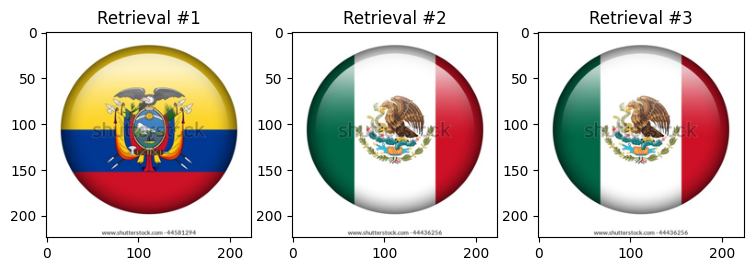

Arithmetic:
cities/berlin + (flags/thailand - cities/bangkok)
Expected result: flags/germany
Model generated outputs:


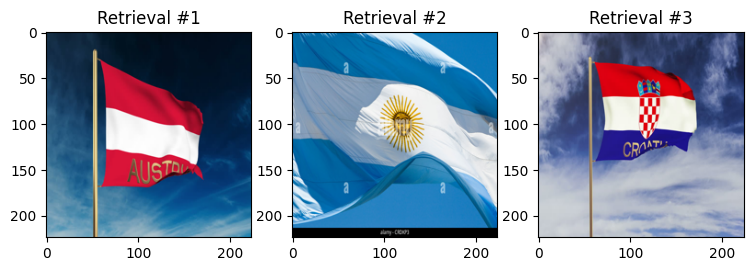

Arithmetic:
cities/bangkok + (flags/china - cities/beijing)
Expected result: flags/thailand
Model generated outputs:


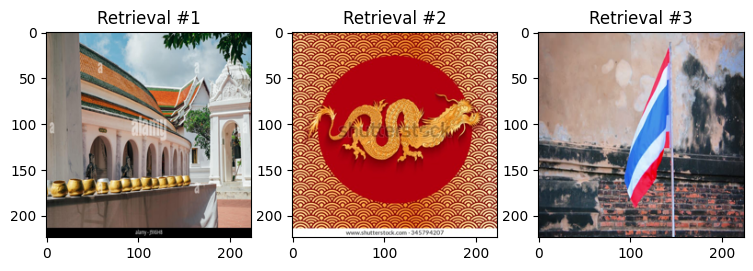

countries -> food
Arithmetic:
food/baguette + (countries/japan - food/sushi)
Expected result: countries/france
Model generated outputs:


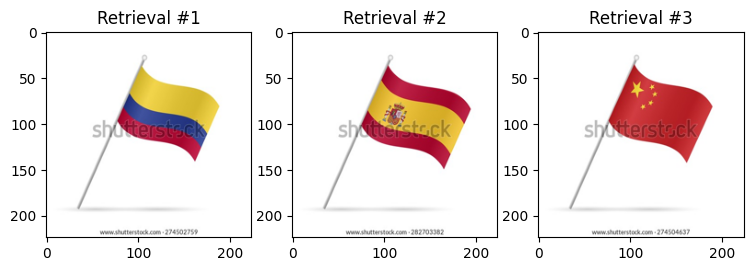

Arithmetic:
food/sushi + (countries/italy - food/pizza)
Expected result: countries/japan
Model generated outputs:


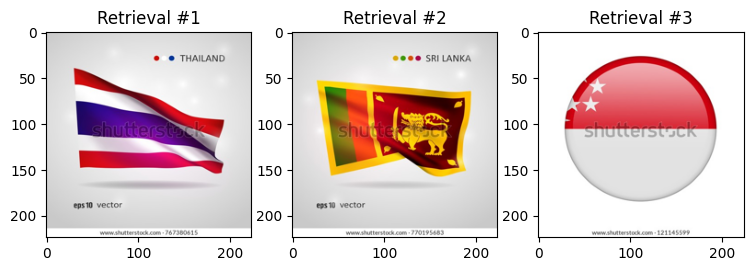

Arithmetic:
food/pizza + (countries/france - food/baguette)
Expected result: countries/italy
Model generated outputs:


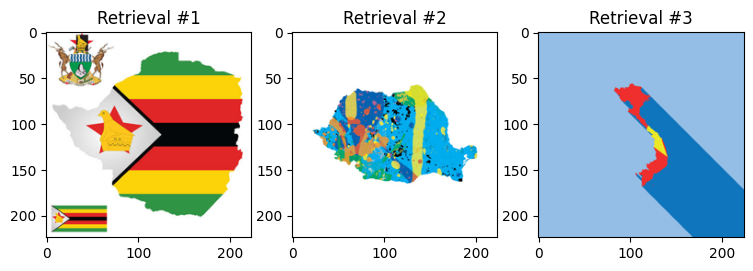

countries -> building
Arithmetic:
building/capitol + (countries/china - building/china_wall)
Expected result: countries/usa
Model generated outputs:


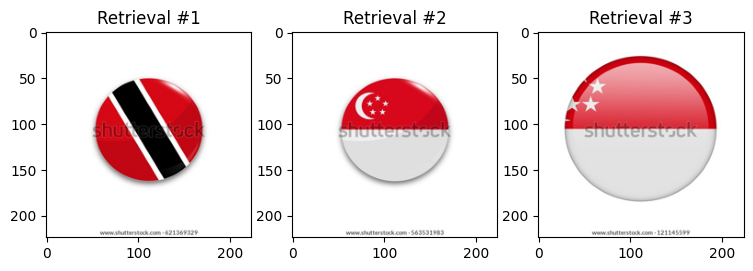

Arithmetic:
building/china_wall + (countries/italy - building/colosseum)
Expected result: countries/china
Model generated outputs:


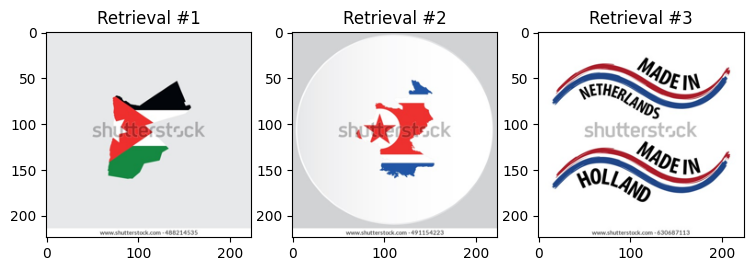

Arithmetic:
building/colosseum + (countries/france - building/eiffle)
Expected result: countries/italy
Model generated outputs:


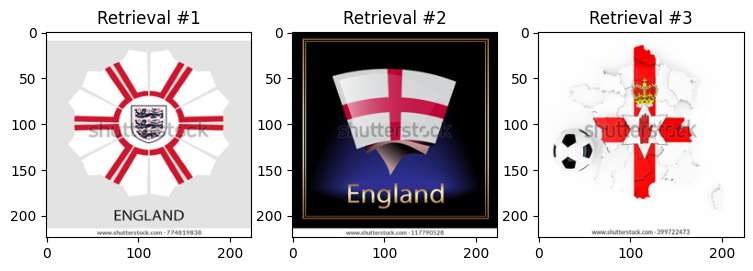

Arithmetic:
building/eiffle + (countries/russia - building/kremlin)
Expected result: countries/france
Model generated outputs:


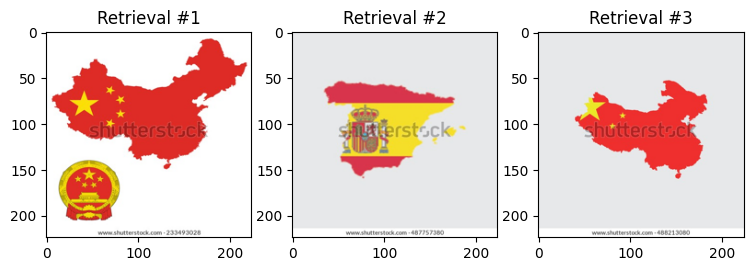

Arithmetic:
building/kremlin + (countries/italy - building/pisa)
Expected result: countries/russia
Model generated outputs:


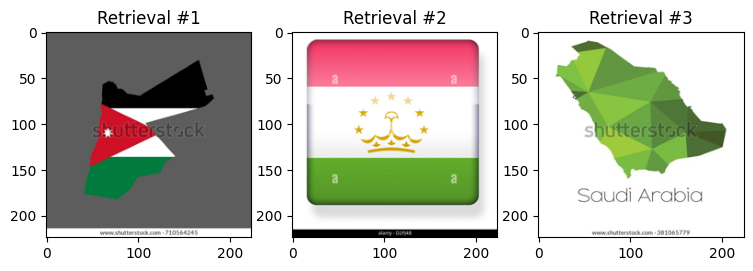

Arithmetic:
building/pisa + (countries/egypt - building/pyramid)
Expected result: countries/italy
Model generated outputs:


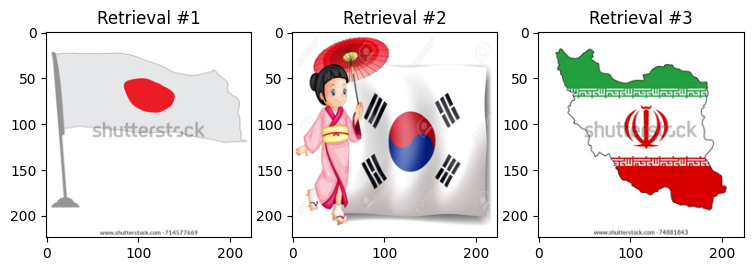

Arithmetic:
building/pyramid + (countries/india - building/taj_mahal)
Expected result: countries/egypt
Model generated outputs:


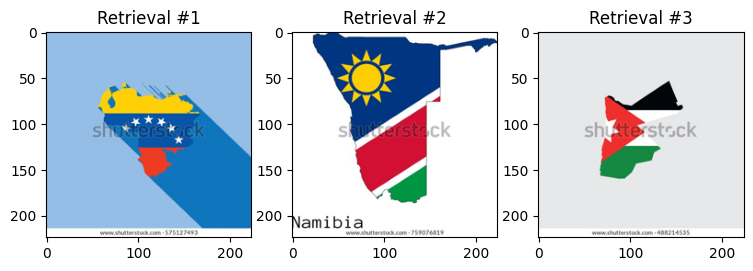

Arithmetic:
building/taj_mahal + (countries/usa - building/capitol)
Expected result: countries/india
Model generated outputs:


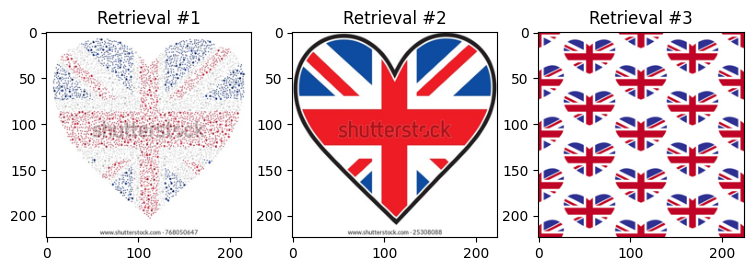

flags -> leaders
Arithmetic:
leaders/angela_merkel + (flags/england - leaders/boris_johnson)
Expected result: flags/germany
Model generated outputs:


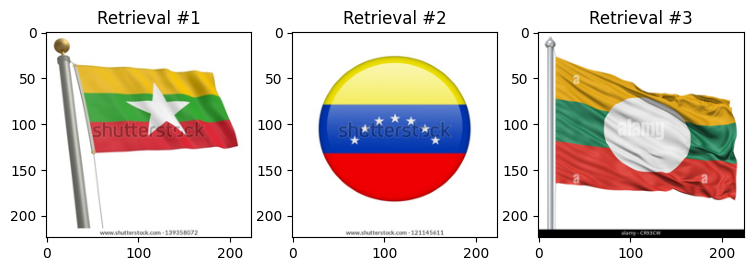

Arithmetic:
leaders/boris_johnson + (flags/england - leaders/david_cameron)
Expected result: flags/england
Model generated outputs:


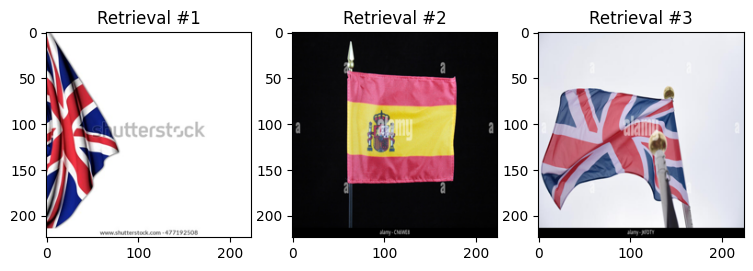

Arithmetic:
leaders/david_cameron + (flags/usa - leaders/hillary)
Expected result: flags/england
Model generated outputs:


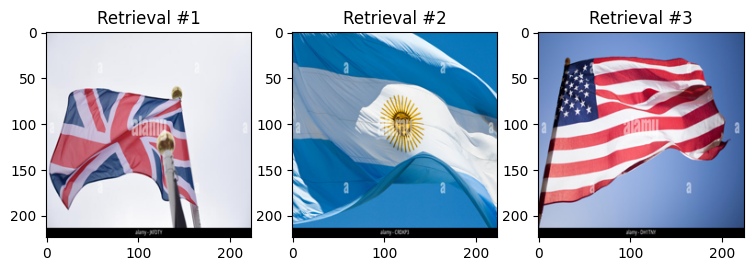

Arithmetic:
leaders/hillary + (flags/canada - leaders/justin_trudeau)
Expected result: flags/usa
Model generated outputs:


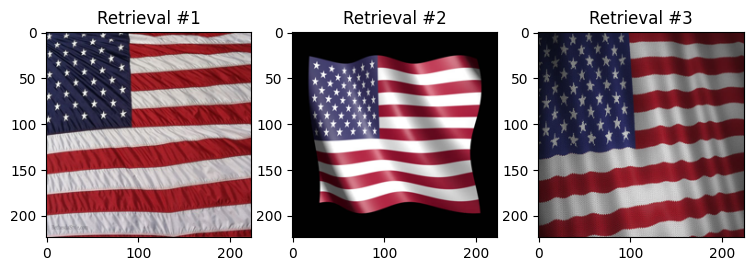

Arithmetic:
leaders/justin_trudeau + (flags/usa - leaders/obama)
Expected result: flags/canada
Model generated outputs:


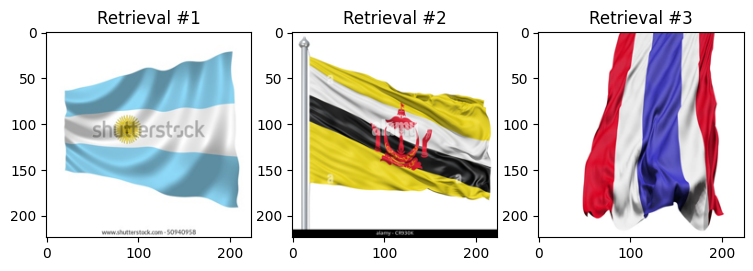

Arithmetic:
leaders/obama + (flags/russia - leaders/putin)
Expected result: flags/usa
Model generated outputs:


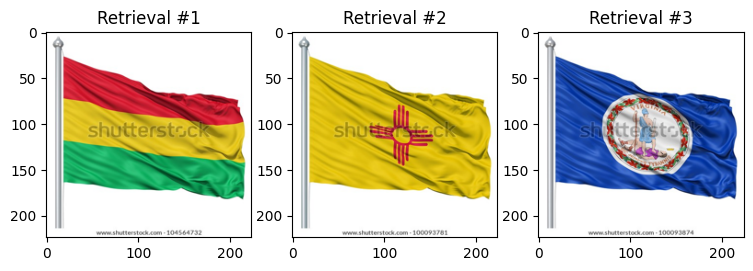

Arithmetic:
leaders/putin + (flags/england - leaders/queen_elizabeth)
Expected result: flags/russia
Model generated outputs:


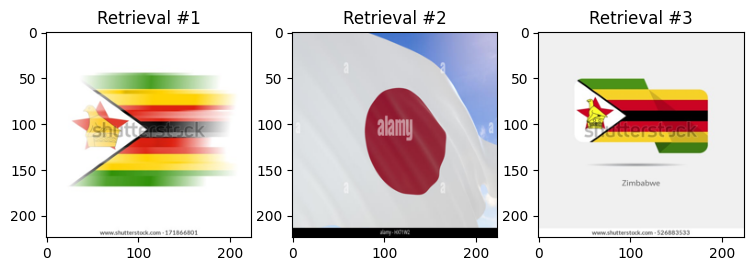

Arithmetic:
leaders/queen_elizabeth + (flags/usa - leaders/trump)
Expected result: flags/england
Model generated outputs:


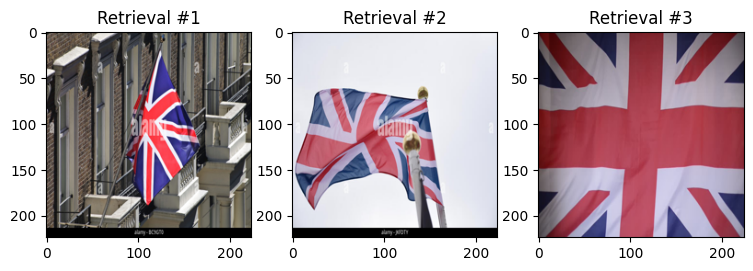

Arithmetic:
leaders/trump + (flags/china - leaders/xi_jinping)
Expected result: flags/usa
Model generated outputs:


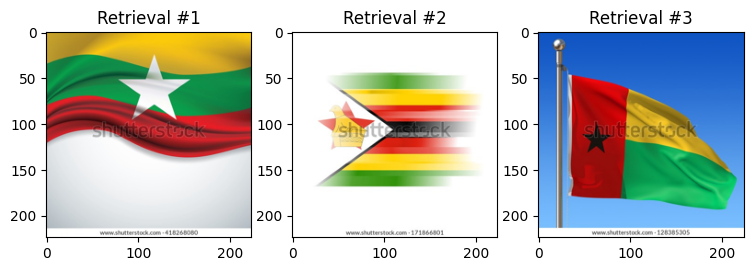

Arithmetic:
leaders/xi_jinping + (flags/germany - leaders/angela_merkel)
Expected result: flags/china
Model generated outputs:


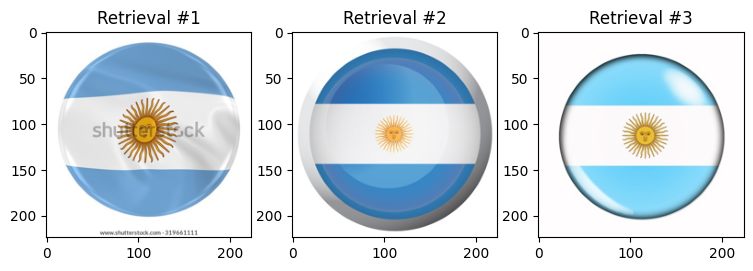

In [5]:
for relation, values in relations_dict.items():
    print(relation)
    print('=' * 120)
    for i in range(0, len(values)):
        tuple1 = values[i]
        
        if i == len(values)-1:
            tuple2 = values[0]
        else:
            tuple2 = values[i+1]
        
        print('='*60)
        print("Arithmetic:")
        print("{} + ({} - {})".format(tuple1[1], tuple2[0], tuple2[1]))
        print("Expected result: {}".format(tuple1[0]))

        inp_image = model.visual_embs[tuple1[1]] + (model.visual_embs[tuple2[0]] - model.visual_embs[tuple2[1]])
        prompt = [inp_image, "[RET]"]

        print('=' * 30)
        model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)

        print('Model generated outputs:')
        parser.display(model_outputs)

tensor([[[-4.0938, -2.7344, -0.3359,  ...,  0.2344,  2.3281, -0.2109]]],
       device='cuda:0', dtype=torch.bfloat16)
Prompt:
[RET]
Model generated outputs:


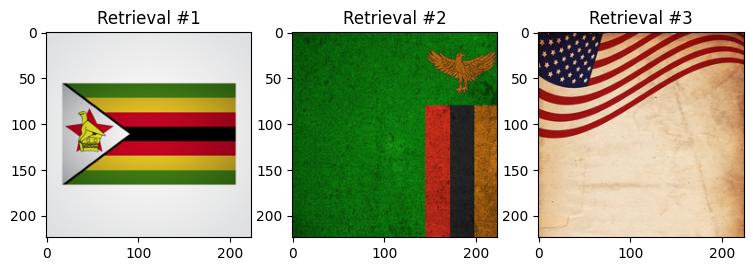

In [5]:
# Do visual arithmetics on the embeddings of the images. Like in ZeroCap
for relation in relations:
    inp_image = (model.visual_embs["countries/japan"] - model.visual_embs["food/sushi"]) + model.visual_embs["food/pizza"]
    prompt = [inp_image, "[RET]"]

    print('Prompt:')
    parser.display(prompt)
    print('=' * 30)
    model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)

    print('Model generated outputs:')
    parser.display(model_outputs)

### Zero-shot no CoT

Prompt:
Task instruction: Perform the visual arithmetic [1,1,-1] on the following three images and predict the output image. Image:
Answer: [RET]
Model generated outputs:


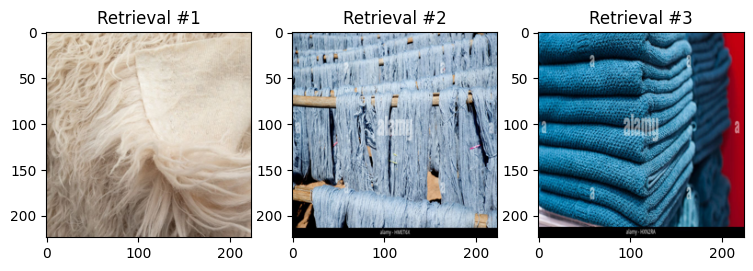

In [6]:
prompt = ["Task instruction: Perform the visual arithmetic [1,1,-1] on the following three images and predict the output image. Image:", model.visual_embs["CEOs/mark_zuckerberg"], model.visual_embs["companies/microsoft"], model.visual_embs["CEOs/bill_gates"], "Answer: [RET]"]

# print('Prompt:')
# display_interleaved_outputs(prompt)
# print('=' * 30)
# model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)

print('Prompt:')
parser.display(prompt)
print('=' * 30)
model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)


# Display outputs.
# print('Model generated outputs:')
# display_interleaved_outputs(model_outputs, one_img_per_ret=False)
print('Model generated outputs:')
parser.display(model_outputs)

### Zero-shot CoT

### Few-shot CoT

# Multi-modal visual arithmetics

### The W2V approach

### Zero-shot no CoT

### Zero-shot CoT

### Few-shot CoT

# Ablation study

### T-SNE

In [7]:
import torch

In [8]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
X = None
y = []

for key, emb in model.visual_embs.items():
    if type(X) == torch.Tensor:
        X = torch.vstack((X, emb))
    else:
        X = emb
    y.append(key.split('/')[0])

X = torch.tensor(X, dtype=torch.float16)
X = torch.squeeze(X)
X = X.detach().cpu().numpy()

X.shape
print(y)

['countries', 'countries', 'countries', 'countries', 'countries', 'countries', 'countries', 'countries', 'food', 'food', 'food', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'building', 'building', 'building', 'building', 'building', 'building', 'building', 'building', 'building', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'companies', 'companies', 'companies', 'companies', 'companies', 'CEOs', 'CEOs', 'CEOs', 'CEOs', 'CEOs']


/tmp/ipykernel_19419/1561723609.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float16)


[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 74 / 74
[t-SNE] Mean sigma: 39.526697
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.917302
[t-SNE] KL divergence after 275 iterations: 0.177454


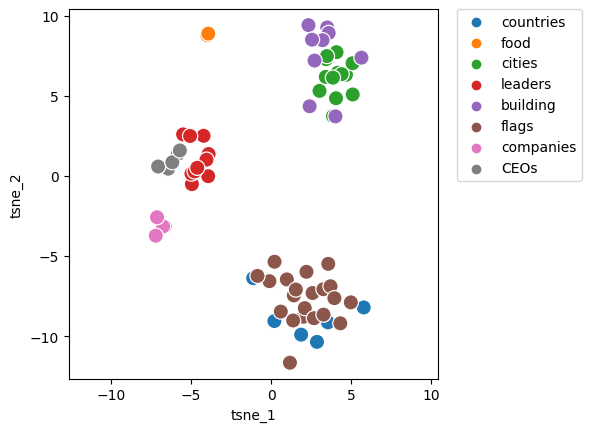

In [14]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



tsne = TSNE(n_components=2,  perplexity=20, n_iter=275, verbose=True, method='exact')
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-1, tsne_result.max()+1)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)